<h1><font color = #EDB418>Análise para PProductions


<h2><font color = #EDB418>Objetivo

O cenário cinematográfico está se tornando cada vez mais competitivo, especialmente devido ao crescimento dos canais de streaming. Com a conveniência de assistir filmes em casa, atrair o público para os cinemas tem se tornado um desafio crescente.

Por isso, quando um estúdio decide lançar um filme, é crucial entender as preferências do público para produzir um conteúdo que não apenas agrade os espectadores e a crítica, mas também seja financeiramente rentável.

Assim, o objetivo desta análise é identificar os fatores que contribuem para a boa avaliação de um filme.  

<h2><font color = #EDB418>Sobre o dataset

![](https://cdn4.iconfinder.com/data/icons/logos-and-brands/512/171_Imdb_logo_logos-512.png)

É um conjunto de dados do site [IMDB](https://www.imdb.com/), onde os filmes e séries de TV recebem notas por sua qualidade para os usuários.<br>
Essa base de dados foi fornecida pela Indicium, mas tambem pode ser encontrada na plataforma do [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata).


<h2><font color=#EDB418>  Métodos usados

Todo o processo de análise será dividido em três etapas:

1. Preparação e limpeza dos dados
>Fazer uma análise inicialmente para procurar dados nulos, duplicados, e também verificar a existência de outliers ou erros no conjunto de dados.
1. Análise exploratória dos dados
>Analisar de forma mais profunda os dados por meio de gráficos e estatísticas, para tentar encontrar a resposta à pergunta: O que faz um filme ser lucrativo?
1. Criação de um modelo de Machine Learning
>Por fim criaremos um modelo, para prever as notas do IMDB dos filmes.
1. Respostas as perguntas do desafio da Indicium


<h3><font color=#EDB418>Dicionário dos dados

* **Series_Title** – Nome do filme
* **Released_Year** - Ano de lançamento
* **Certificate** - Classificação etária
* **Runtime** – Tempo de duração
* **Genre** - Gênero
* **IMDB_Rating** - Nota do IMDB
* **Overview**- Overview do filme
* **Meta_score** - Média ponderada de todas as críticas
* **Director** – Diretor
* **Star1** - Ator/atriz #1
* **Star2** - Ator/atriz #2
* **Star3** - Ator/atriz #3
* **Star4** - Ator/atriz #4
* **No_of_Votes** - Número de votos
* **Gross** - Faturamento


#<h2><font color=#EDB418>1.Preparação e limpeza dos dados

In [ ]:
# Funções
def classificacao(x):
    if x == "A":
        return "A"
    elif x == "U":
        return "U"
    elif x == "UA":
      return "UA"
    elif x == "R":
        return "A"
    elif x == "PG-13":
        return "UA"
    elif x == "PG":
        return "UA"
    else:
        return "U"

In [ ]:
# Instalando pacote
!pip install unidecode

In [ ]:
# Impoprtando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import unidecode
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Importando os dados
df = pd.read_csv('desafio_indicium_imdb.csv')

In [ ]:
# visualizando os dados
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [ ]:
# Verificando informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [ ]:
# Algumas estatisticas sobre os dados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,999.0,500.000000,288.530761,1.0,250.5,500.0,749.5,999.0
IMDB_Rating,999.0,7.947948,0.272290,7.6,7.7,7.9,8.1,9.2
Meta_score,842.0,77.969121,12.383257,28.0,70.0,79.0,87.0,100.0
No_of_Votes,999.0,271621.422422,320912.621055,25088.0,55471.5,138356.0,373167.5,2303232.0


Aqui já conseguimos ver uma caracteristica desses dados. Essa lista é composta por filmes que são considerados bons filmes até ótimos filmes. Tanto que a menor nota do IMDB registrada é de 7.6 e a média é de 7.9.

In [ ]:
# Procurando dados nulos
df.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [ ]:
# Procurando dados duplicados
df.duplicated().any()

False

In [ ]:
# Valores únicos nos dados
df.nunique()

Unnamed: 0       999
Series_Title     998
Released_Year    100
Certificate       16
Runtime          140
Genre            202
IMDB_Rating       16
Overview         999
Meta_score        63
Director         548
Star1            659
Star2            840
Star3            890
Star4            938
No_of_Votes      998
Gross            822
dtype: int64

---
Ao realizar uma breve análise dos dados, identificamos alguns problemas, como o formato inadequado dos dados, a presença de valores nulos e informações desnecessárias.<br>



Visto que a coluna **Overview** não é composta por dados qualitativos ou quantitativos, vou colocá-la em uma variável para utilizar depois. Em seguida, transformarei os dados da coluna **"Runtime"** de string para um formato inteiro e separarei os valores da coluna **"Genre"** em múltiplas colunas.


In [ ]:
# Serparando os dados de "Overview" em uma variável
overview = df.pop('Overview')

# Deletando coluna "Unnamed: 0"
df = df.drop(columns="Unnamed: 0")

In [ ]:
# trabalhando com "Runtime"
#Seprando os dados pela função split
df["Runtime"] = df["Runtime"].str.split(" ").str.get(0)

# Alterando o formato dos dados
df["Runtime"] = df["Runtime"].astype(int)

In [ ]:
# Separando os dados da coluna "Genre"
df[['Genre_1', 'Genre_2', 'Genre_3']] = df['Genre'].str.split(',', expand=True)


# Preenchendo os valores nulos das colunas com strings vazias
df['Genre_2'] = df['Genre_2'].fillna(" ")
df['Genre_3'] = df['Genre_3'].fillna(" ")

# Removendo a coluna "Genre"
df = df.drop('Genre', axis=1)

Agora vamos trabalhar na coluna **"Certificate"**, onde temos alguns problemas:
* 101 registros nulos
* Muitos registros diferentes sobre a classificação indicativa, provavelmente porque os filmes vem de paises diferentes

A solução encontrada vai ser usar a moda para preencher os nulos. E criar uma simplificação com apenas três classificações:
* **A** - Filmes recomendado para maiores
* **UA** - Filme não recomendado para menos de 14 anos
* **U** - Filme livre para todos os publicos

Usarei a função personalizada **"classificação"** para fazer essa tarefa








In [ ]:
# Contagem dos valores da coluna "Certificate"
df["Certificate"].value_counts()

Certificate
U           234
A           196
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64

In [ ]:
# Aplicando função para simplificar as classificações
df["Certificate"] = df['Certificate'].apply(classificacao)

Agora precisamos remover o dados nulos de **"Meta_score"**, usaremos a média para fazer a substituição.<br>
E Depois transformamos os dados de **"Gross"** para valor inteiro, e substituiremos os nulos pela média.

In [ ]:
#Subistituindo os dados nulos pela média em "Meta_score"
df["Meta_score"].fillna(df["Meta_score"].mean(), inplace=True)

#Tirando a virgula nos valores em "Gross"
df["Gross"] = df["Gross"].str.replace(",", "")


#Achando a média dos valores
#selecionando valores apenas não nulos para variável
valor = df.loc[df['Gross'].notnull()]

#Transformando os dados em inteiro
valor["Gross"] = valor["Gross"].astype(int)

#Encontrando a média
media = str(valor["Gross"].mean())

#Subistituindo valores nulos
df["Gross"].fillna(media, inplace=True)

#transformando em numero inteiro
df["Gross"] = df["Gross"].astype(float)

Agora com os dados limpos, vamos visualizar e ver a quantidade de nulos.

In [ ]:
# Visualizando os dados
df.head()

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre_1,Genre_2,Genre_3
0,The Godfather,1972,A,175,9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime,Drama,
1,The Dark Knight,2008,UA,152,9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action,Crime,Drama
2,The Godfather: Part II,1974,A,202,9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Crime,Drama,
3,12 Angry Men,1957,U,96,9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,Crime,Drama,
4,The Lord of the Rings: The Return of the King,2003,U,201,8.9,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,Action,Adventure,Drama


In [ ]:
# Verificando a existência de nulos novamente
df.isnull().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
Genre_1          0
Genre_2          0
Genre_3          0
dtype: int64

# <h2><font color=#EDB418>2. Análise exploratória dos dado

Agora com os dados limpos, e sem valores nulos podemos iniciar a fase de exploração dos dados.

A primeira coisa importante a saber para a realização de um filme é o seguinte: **Existe um correlação entre um filme com boas notas e um filme com bom faturamento?**

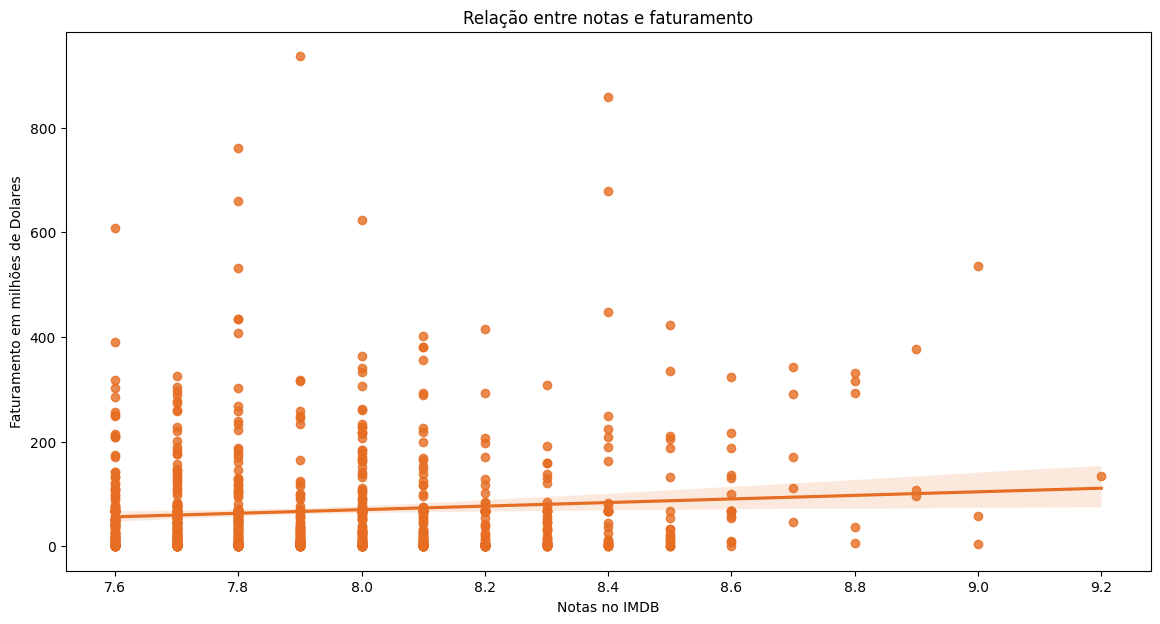

In [ ]:
# Criando o gráfico de dispersão
# Transformando o faturamento em milhões de dolares
df["fat_mi"] = df["Gross"].apply(lambda x: x/1000000)

# Criando o gráfico
plt.figure(figsize=(14,7))
sns.regplot(y=df['fat_mi'], x=df['IMDB_Rating'], color ="#E66D22" )

# Adicionando títulos e rótulos
plt.title('Relação entre notas e faturamento')
plt.xlabel('Notas no IMDB')
plt.ylabel('Faturamento em milhões de Dolares')

# Exibindo o gráfico
plt.show()

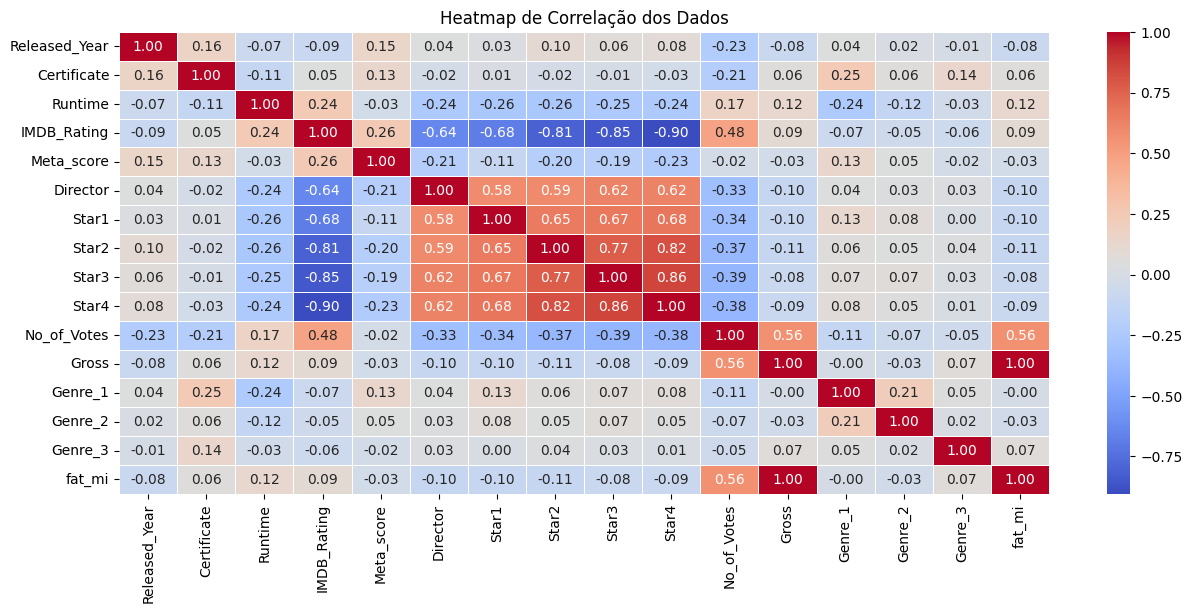

In [ ]:
#Criando gráfico de correlação
#Fazendo uma cópia dos dados
X = df.copy()

#Apagando dados alguns dados
X.drop(['Series_Title'], axis=1, inplace=True)

#Transformando todos os dados  para formato numéricos
for colname in X.select_dtypes(["object"]):
  X[colname], _ = X[colname].factorize()

#Removendo as colunas que não serão usadas
# Calculando a matriz de correlação
corr = X.corr()

# Criando o heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adicionando títulos
plt.title('Heatmap de Correlação dos Dados')

# Mostrando o gráfico
plt.show()


Ao observar esses dois gráficos, pode-se afirmar que não existe correlação significativa entre o faturamento e as notas no IMDB neste conjunto de dados, pois o coeficiente de correlação é de apenas 0,09, um valor bastante baixo. No entanto, isso não deve ser considerado uma regra geral para todos os filmes, porque nosso conjunto de dados é pequeno, com apenas 999 registros, e todos são filmes com boas notas, o que já introduz um viés nos dados. Seria necessário uma amostra maior e mais diversificada para poder afirmar essa conclusão com certeza.

Mas nesse gráfico de correlação conseguimos encontrar algumas coisas bem interessantes.



* O faturamento tem uma correlação forte com o número de votos.
* E as notas do IMDB tem uma correlação moderada com o número de votos.
* A escolha do diretor tem uma correlação negativa forte com a nota no IMDB.

Vamos visualizar melhor essa relação entre número de votos e faturamento.

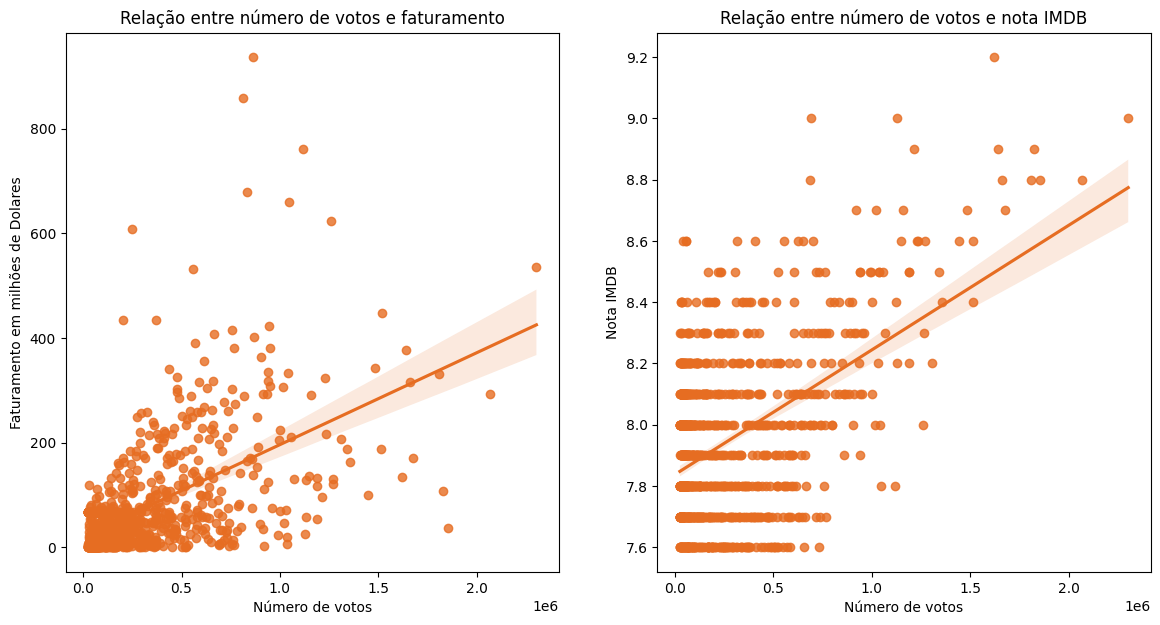

In [ ]:
# Dividindo o gráfico em dois
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Criando o primeiro gráfico
sns.regplot(y=df['fat_mi'], x=df['No_of_Votes'], color ="#E66D22", ax=axs[0] )
axs[0].set_title('Relação entre número de votos e faturamento')
axs[0].set_xlabel('Número de votos')
axs[0].set_ylabel('Faturamento em milhões de Dolares')

# Adicionando títulos e rótulos
sns.regplot(y=df['IMDB_Rating'], x=df['No_of_Votes'], color ="#E66D22", ax = axs[1] )
axs[1].set_title('Relação entre número de votos e nota IMDB')
axs[1].set_xlabel('Número de votos')
axs[1].set_ylabel('Nota IMDB')


# Exibindo o gráfico
plt.show()



Então primeiro vamos considerar a questão do gênero do filme.

O gráfico acima evidencia claramente que **boas avaliações e um alto faturamento estão fortemente associados ao interesse do público em assistir ao filme.**

Portanto, é fundamental responder à seguinte pergunta: o que mais motiva as pessoas a assistir a um filme? Entre os diversos fatores que influenciam essa decisão, podemos afirmar que o gênero desempenha um papel significativo. Afinal, tendemos a assistir aquilo que nos interessa. Mas, quais gêneros de filmes despertam mais interesse nas pessoas?

Então primeiro vamos considerar a questão do gênero do filme.

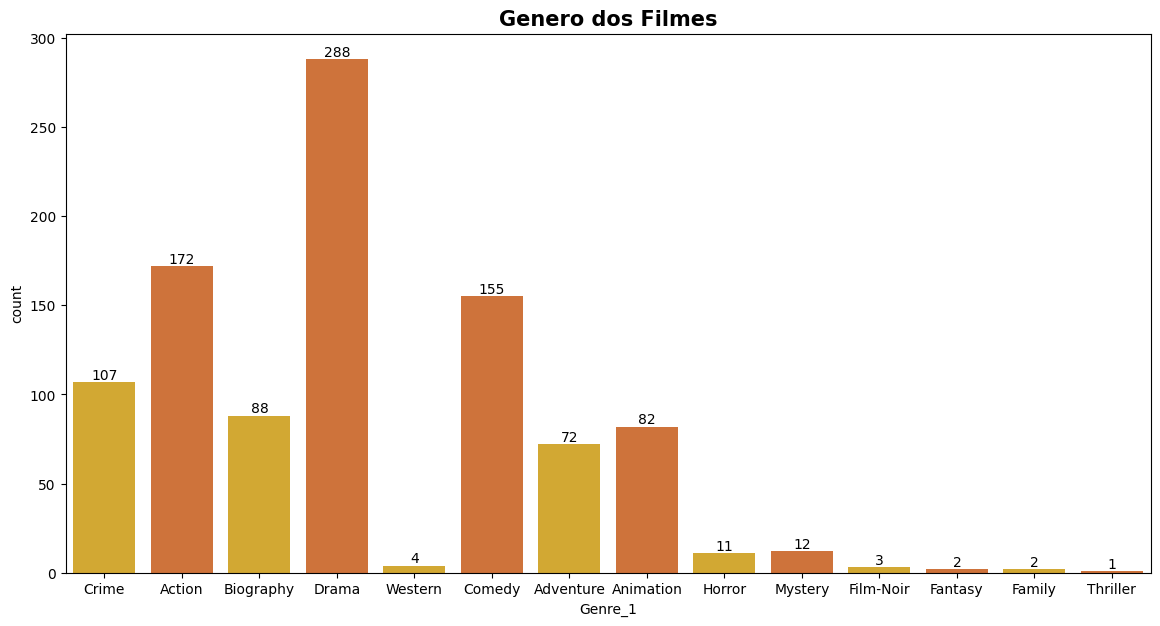

In [ ]:
# Cores usadas
colors = [ "#EDB418", '#E66D22']

# criando o gráfico de baras
plt.figure(figsize=(14,7))
plt.title("Genero dos Filmes", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(data = df, x = "Genre_1", palette= colors)
# Adicionar rotulos as colunas
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Nesse conjunto de dados os gêneros que mais se repetem são:

1. Drama
2. Ação
3. Comédia
4. Crime
5. Biografía

Mas quais são os que se saem melhor?

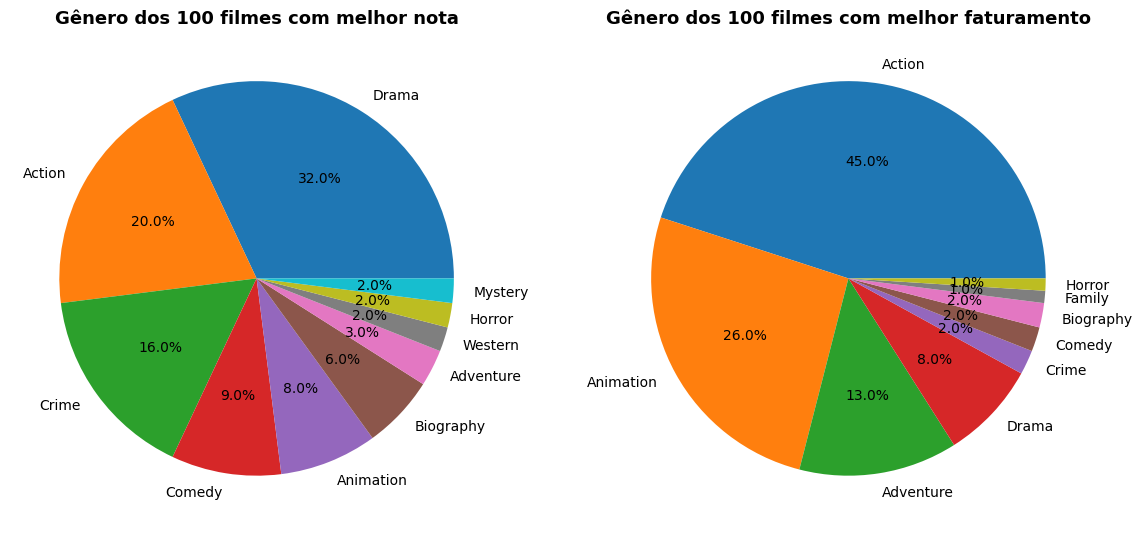

In [ ]:
# Selecionando as 100 maiores notas por gênero
notas = df.nlargest(100, 'IMDB_Rating')
contagem_notas = notas['Genre_1'].value_counts()

# Selecionando os 100 maires faturamentos
faturamento = df.nlargest(100, 'Gross')
contagem_faturamento = faturamento['Genre_1'].value_counts()

# Criando uma figura com graficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico de gênero
label_n = contagem_notas.index.unique().tolist()
ax1.set_title("Gênero dos 100 filmes com melhor nota", fontsize=13, fontweight='bold', ha='center')
ax1.pie(contagem_notas, labels = label_n, autopct='%1.1f%%')

# Gráfico de faturamento
label_f = contagem_faturamento.index.unique().tolist()
ax2.pie(contagem_faturamento, labels=label_f, autopct='%1.1f%%',)
ax2.set_title("Gênero dos 100 filmes com melhor faturamento", fontsize=13, fontweight='bold', ha='center')

plt.show()

Os gêneros que tem as melhores notas no IMDB podemos destacar:


1. Drama
2. Ação
3. Crime

O melhor faturamento:


1. Ação
2. Animação
3. Aventura

Algo que pode ajudar na decisão do melhor gênero para o filme é pensar no subgênero



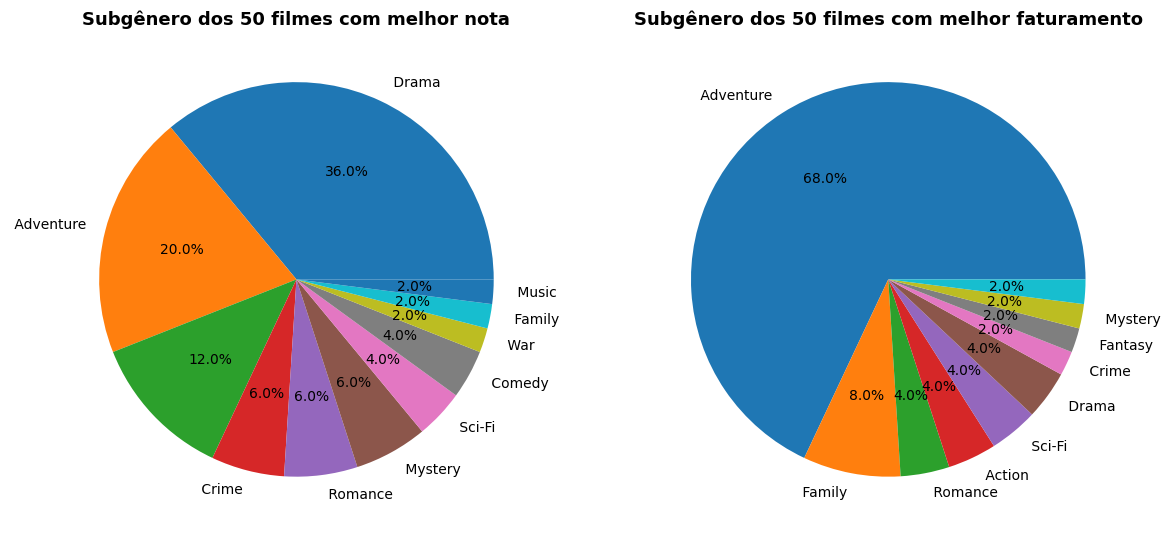

In [ ]:
# Selecionando as 50 maiores notas por gênero
notas = df.nlargest(50, 'IMDB_Rating')
contagem_notas = notas['Genre_2'].value_counts()

# Selecionando os 50 maires faturamentos
faturamento = df.nlargest(50, 'Gross')
contagem_faturamento = faturamento['Genre_2'].value_counts()

# Criando uma figura com graficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico de gênero
label_n = contagem_notas.index.unique().tolist()
ax1.set_title("Subgênero dos 50 filmes com melhor nota", fontsize=13, fontweight='bold', ha='center')
ax1.pie(contagem_notas, labels = label_n, autopct='%1.1f%%')

# Gráfico de faturamento
label_f = contagem_faturamento.index.unique().tolist()
ax2.pie(contagem_faturamento, labels=label_f, autopct='%1.1f%%',)
ax2.set_title("Subgênero dos 50 filmes com melhor faturamento", fontsize=13, fontweight='bold', ha='center')

plt.show()

Com relação ao subgênero podemos destacar:

Melhores notas no IMDB:

1. Drama
2. Aventura
3. Crime

Melhore faturamento:

1. Aventura
2. Família
3. Romance

Mas se o foco principal do filme for  ter um bom faturamento, podemos ver quais são os gênereos que mais faturam na média.

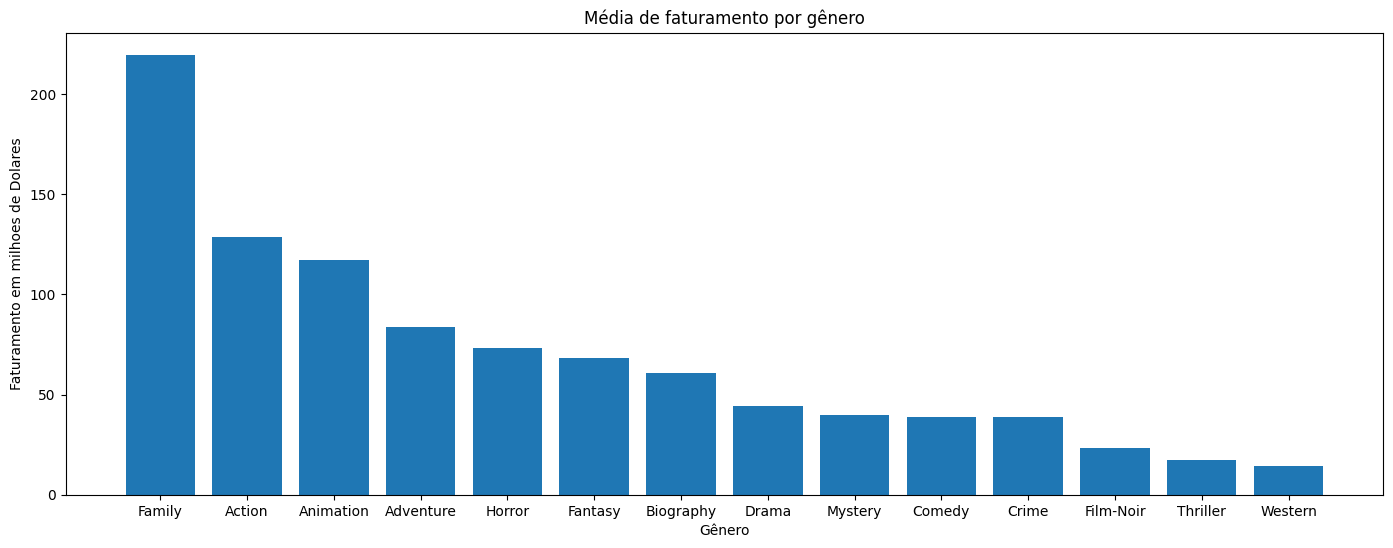

In [ ]:
# Agrupando os dados por 'Categoria'
grouped_df = df.groupby('Genre_1').mean("Gross").sort_values(by='Gross', ascending=False).reset_index()

# Criando uma nova coluna com os valores em milhões
grouped_df["faturamento"] = grouped_df["Gross"].apply(lambda x: x/1000000)

# Criando o gráfico de barras
plt.figure(figsize=(17, 6))
plt.bar(grouped_df['Genre_1'], grouped_df['faturamento'] )
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Gênero')
plt.ylabel('Faturamento em milhoes de Dolares')
plt.title('Média de faturamento por gênero')

plt.show()

Ao analisarmos os dados pela média, obtemos uma visão mais realista do conjunto. Neste gráfico, os filmes do gênero família apresentam um desempenho médio superior ao dos filmes de ação. Isso ocorre porque alguns filmes de ação podem ter um faturamento extremamente alto, criando outliers que distorcem a compreensão dos dados.

Esse é um ponto crucial a ser considerado ao escolher um gênero, especialmente na avaliação do potencial de faturamento.

---
<h2><font color = #EDB418> Conclusão


O gráfico de correlação revelou que um bom faturamento e boas avaliações estão correlacionados com o número de votos recebidos. As pessoas que votaram provavelmente assistiram aos filmes porque estes eram de seu interesse. O gênero do filme desempenha um papel significativo nessa decisão.

Portanto, ao escolher o gênero do filme, é crucial considerar os objetivos do estúdio.

Se o objetivo é obter melhores notas no IMDB, o estúdio poderia optar por produzir **dramas**, filmes de **ação** e **crime**, já que esses gêneros tendem a receber melhores avaliações.

Por outro lado, se o principal objetivo do estúdio é alcançar um alto faturamento, poderia optar por filmes de **ação, animação e aventura**. É importante também considerar subgêneros que incluam elementos de **aventura**. Outra opção seria filmes do gênero **família**, que demonstraram um melhor desempenho médio nesse conjunto de dados.

---


Agora vamos analisar tambem os diretores que tiveram um melhor desempenho

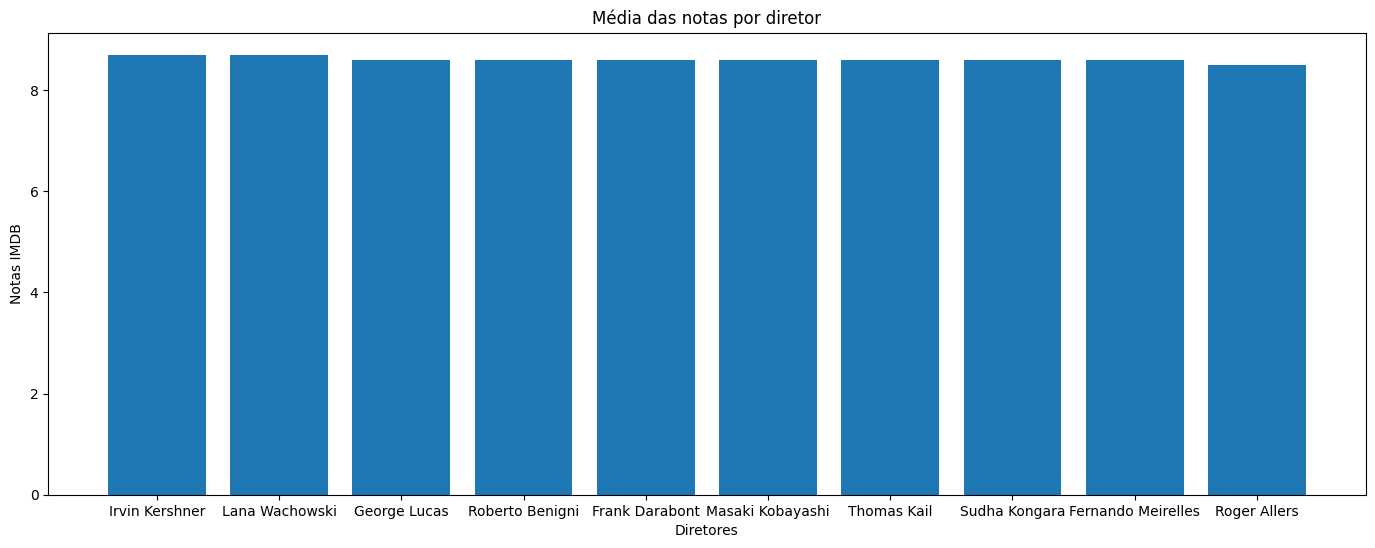

In [ ]:
# Agrupando os dados por 'Categoria'
grouped_df = df.groupby('Director').mean("IMDB_Rating").sort_values(by='IMDB_Rating', ascending=False).reset_index()

#separando os 10 com media melhor de notas
melhores = grouped_df.nlargest(10, 'IMDB_Rating')
# Criando o gráfico de barras
plt.figure(figsize=(17, 6))
plt.bar(melhores['Director'], melhores['IMDB_Rating'] )
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Diretores')
plt.ylabel('Notas IMDB')
plt.title('Média das notas por diretor')

plt.show()

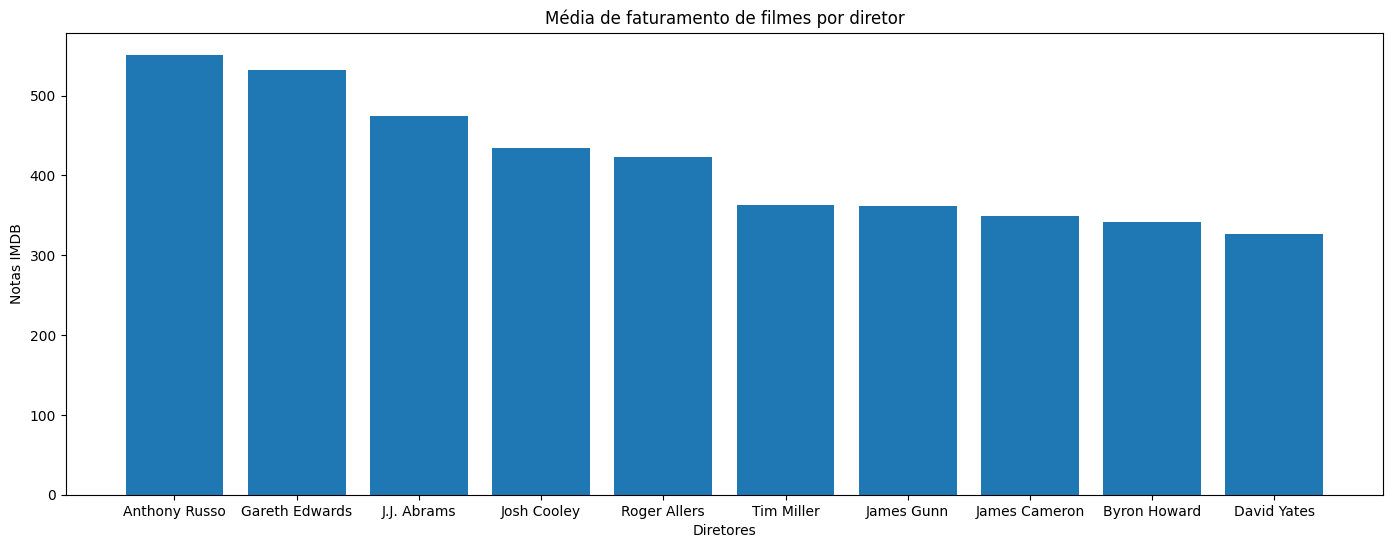

In [ ]:
# Agrupando os dados por 'Categoria'
grouped_df = df.groupby('Director').mean("Gross").sort_values(by='Gross', ascending=False).reset_index()

# Criando uma nova coluna com os valores em milhões
grouped_df["faturamento"] = grouped_df["Gross"].apply(lambda x: x/1000000)

# Separando os 10 com media melhor de notas
melhores = grouped_df.nlargest(10, 'faturamento')

# Criando o gráfico de barras
plt.figure(figsize=(17, 6))
plt.bar(melhores['Director'], melhores['faturamento'] )
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Diretores')
plt.ylabel('Notas IMDB')
plt.title('Média de faturamento de filmes por diretor')

plt.show()

Ao observar a média das notas dos filmes do diretores não vemos muita diferença significativa, onde não encontramos nenhum diretor que estivesse com notas muitos superiores a dos outros.  

Mas quando pensamos em faturamento já conseguimos ver que alguns diretores produzem filmes que na média fatura mais do que os outros.

---
<h2><font color = #EDB418>Conclusão

Conforme o gráfico de correlação mostrou, a escolha do diretor afeta significativamente as notas que um filme recebe no IMDb. No entanto, isso não ficou tão evidente com este conjunto de dados, pois todos os filmes possuem boas notas, introduzindo um viés nos resultados. Por outro lado, ao analisar o faturamento, ficou claro que, em média, alguns diretores produzem filmes com melhor retorno financeiro.


Portanto, ao escolher um diretor para um próximo filme, é crucial considerar o impacto do diretor no sucesso do projeto.

---

Agora vamos analisa se o **tempo de filme**  afeta sua nota e faturamento.

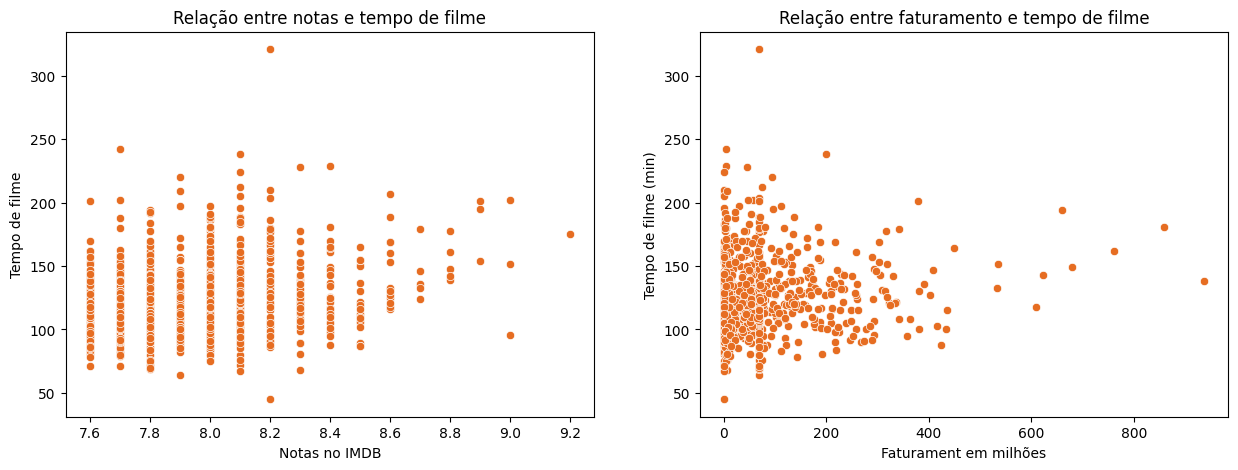

In [ ]:
# Criar subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Primeiro scatter plot
sns.scatterplot(y='Runtime', x='IMDB_Rating', data = df, color ="#E66D22", ax=axs[0] )
axs[0].set_title('Relação entre notas e tempo de filme')
axs[0].set_xlabel('Notas no IMDB')
axs[0].set_ylabel('Tempo de filme')

# Segundo scatter plot
sns.scatterplot(y='Runtime', x='fat_mi', data = df, color ="#E66D22" )
axs[1].set_title('Relação entre faturamento e tempo de filme')
axs[1].set_xlabel('Faturament em milhões')
axs[1].set_ylabel('Tempo de filme (min)')

# Exibindo o gráfico
plt.show()

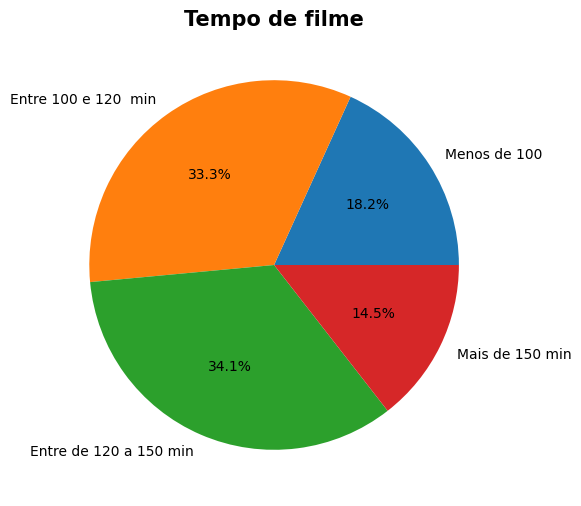

In [ ]:
# Selecionando os filmes
pequenos = df.loc[df['Runtime']<100]
menores = df.loc[(df['Runtime']<=120) & (df['Runtime']>=100)]
grandes = df.loc[(df['Runtime']<=150) & (df['Runtime']>=120)]
maiores = df.loc[df['Runtime']>150]

# Gráfico de pizza
plt.figure(figsize=(10, 6))
valores = pd.DataFrame([len(pequenos['Runtime']),len(menores['Runtime']),
                        len(grandes['Runtime']), len(maiores['Runtime'])])
label_f = ["Menos de 100","Entre 100 e 120  min", "Entre de 120 a 150 min",
           "Mais de 150 min"]
plt.title("Tempo de filme", fontsize=15, fontweight='bold', ha='center')
plt.pie(valores[0], labels = label_f, autopct='%1.1f%%' );

plt.show()



Ao analisar os gráficos dos filmes , observamos que a grande maioria dof filmes estão entre 100 e 150 minutos de duração. Embora isso não seja uma regra, muitas vezes as pessoas não estão dispostas a assistir a filmes muito longos.

---

Agora vamos analisar a coluna "Overview", e ver se conseguimos tirar insights dela.

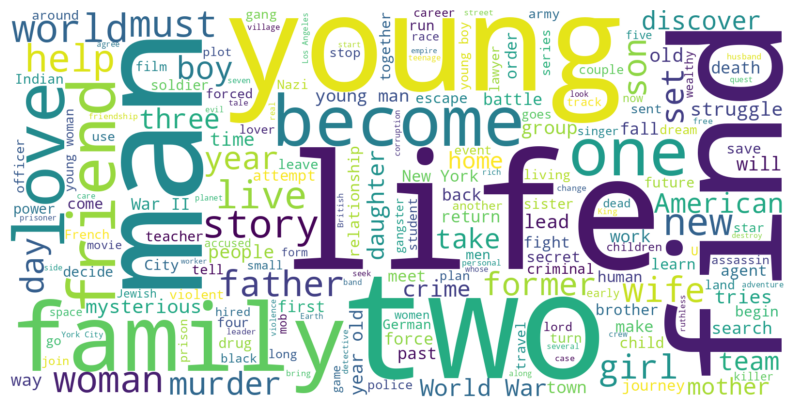

In [ ]:
# Utilizando a coluna todo_texto
overview
todo_texto = ' '.join(i for i in overview)

texto_sem_virgulas = re.sub(r"[.,?!']", '',  todo_texto)

# Configurar stopwords
stopwords = set(STOPWORDS)
stopwords.update(["de", "a", "o", "é"])

# Gerar a nuvem de palavras
wordcloud = WordCloud(stopwords=stopwords,
                      width=1600, height=800,
                      background_color="white").generate(texto_sem_virgulas)

# Exibir a nuvem de palavra
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Aqui nós conseguimos ver as palavras que mais se repetem na coluna overview, e isso nos da uma ideia do que abordar na história do filme. As palavras em destaque que encontramos são:
* Find
* Life
* Man
* Two
* Family

Então ao adptar o escrever o roteiro do filme, pode-se pensar nessas palavras e em outras que aparecem no gráfico e tentar usar algum elemento no filme que tenha relação com elas.  

#<h2><font color=#EDB418>3. Criacao do modelo

Vamos iniciar a criação do modelo de machine learning. Decidi refazer tudo desde a importação da base de dados, pois agora quero adotar uma abordagem mais simples.

In [ ]:
# Importando as bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [212]:
# Importando os dados
df = pd.read_csv('desafio_indicium_imdb.csv')

1. Remover "Unnamed: 0", "Overview", "Series_Title"

In [213]:
# Removendo colunas que não serão utilizadas
df.drop(["Unnamed: 0", "Overview","Series_Title"], axis=1, inplace=True)

2. A coluna "Gross" precisa estar em formato de float

In [214]:
# Alterando para float o valor de Gross
df["Gross"] = df["Gross"].str.replace(",", "").astype(float)

3. A coluna "Runtime" e "Released_Year", precisam estar em formato int.  Mas na coluna "Released_Year" na linha 965 existe um dado no formato errado, ao invés do ano esta **"PG"**. Então é necessário substituir pelo ano q o filme foi feito 1995.

In [215]:
# Dividindo o valor de Runtime
df["Runtime"] = df["Runtime"].str.split(" ").str.get(0).astype(int)

# Aleterando Released_Year
df.loc[965, 'Released_Year'] = 1995
df["Released_Year"] = df["Released_Year"].astype(int)

4. Aplicar a função classificação na coluna "Certificate"

In [216]:
#Função
def classificacao(x):
    if x == "A":
        return "A"
    elif x == "U":
        return "U"
    elif x == "UA":
      return "UA"
    elif x == "R":
        return "A"
    elif x == "PG-13":
        return "UA"
    elif x == "PG":
        return "UA"
    else:
        return "U"

In [217]:
df["Certificate"] = df['Certificate'].apply(classificacao)


5. Separando os gêneros

In [218]:
# Separando os dados da coluna "Genre"
df[['Genre_1', 'Genre_2', 'Genre_3']] = df['Genre'].str.split(',', expand=True).fillna('')

# Removendo a coluna "Genre"
df = df.drop('Genre', axis=1)

6. Transformar todos os dados qualitativos em numéricos

In [219]:
# Selecionando colunas e transformando os formatos
for colname in df.select_dtypes(["object", "category"]):
 df[colname], _ = df[colname].factorize()

7. Dividindo os dados entre treino e teste


In [220]:
# Definindo X e y
X = df.drop("IMDB_Rating", axis=1)
y = df["IMDB_Rating"]

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [221]:
# Criando instâncias
imputer =SimpleImputer()
rfr = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
scaler = MinMaxScaler(feature_range=(0,1))

8. Criando uma pipele para fazer as previsões

In [222]:
# Criando a pipeline
pipe = make_pipeline(imputer, scaler, rfr)


In [223]:
# Treinar a pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, n_estimators=500,
                                       random_state=42))])

In [224]:
# Fazendo previsões
p = pipe.predict(X_test)

# Avaliando o  modelo
mae = mean_absolute_error(y_test, p)
print(f'MAE: {mae}')

MAE: 0.00978400000002987


"Optei por usar uma pipeline, pois torna o código muito mais claro e organizado.

No final, o resultado da média do erro absoluto foi de 0.009, o que é mais do que suficiente para este caso.

<h2>Salvando o modelo com Pickle

In [ ]:
#importando bibliotecas
import pickle

In [226]:
with open('model.pkl', 'wb') as file:
    pickle.dump(pipe, file)

<h2> Fazendo a previsão de um novo filme

In [235]:
#importando o modelo
with open ('model.pkl', 'rb') as file:
    pipe = pickle.load(file)

Como era apenas um filme, fiz as alterações manualmente. No entanto, se tivesse que prever mais dados, faria isso de forma automatizada.

In [229]:
# Criando um Data Frame
filme = pd.DataFrame(
 {'Released_Year': 1994,
 'Certificate': 'A',
 'Runtime': 142,
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': 28341469,
  'Genre_1' : 'Drama',
  'Genre_2' : '',
  'Genre_3' : ''}, index=[0])


Tive um problema ao converter os valores desses dados. Meu objetivo inicial era usar o mesmo fit que utilizei para converter os dados originais, mas infelizmente não consegui. Para conseguir entregar, acabei convertendo os dados dessa forma, mesmo sabendo que não é a maneira correta. Continuo estudando para resolver isso de forma adequada na próxima vez.

In [232]:
# Convertendo os dados para valores numéricos
for colname in filme.select_dtypes(["object", "category"]):
 filme[colname], _ = filme[colname].factorize()

In [233]:
# visualizando os dados
filme

,Released_Year,Certificate,Runtime,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre_1,Genre_2,Genre_3
0,1994,0,142,80.0,0,0,0,0,0,2343110,28341469,0,0,0


In [236]:
# Fazendo a previsão
pipe.predict(filme)

array([9.0108])

O resultado foi de 9.01, sendo que o filme no IMDB tem nota de 9.3. Acredito que ao converter os dados da forma igual ao usado na base de dados original, o resultado ficaria mais próximo do esperado.

# <h2><font color=#EDB418>4. Respondendo as perguntas do desafio

2a - Qual filme você recomendaria para uma pessoa que você não conhece?
> Eu precisaria saber a escolha de filme da pessoa. A partir dessa escolha, eu poderia recomendar filmes do mesmo gênero, filmes do mesmo diretor e até filmes com uma sinopse semelhante.

2b - Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
> Ao realizar a análise, ficou evidente que a maior correlação com o faturamento nesta base de dados está no número de votos. Assim, quanto mais pessoas votaram, entende-se que mais pessoas assistiram ao filme. Uma das métricas que utilizei foi analisar como a escolha do gênero afeta a quantidade de pessoas que desejam assistir ao filme. Ficou claro que certos gêneros de filmes são mais rentáveis do que outros, especialmente porque boa parte do lucro de um filme ainda vem do cinema. Então, o que motiva as pessoas a irem ao cinema? Acredito que o gênero do filme é uma das respostas. E como os dados mostram é importante escolher um diretor que mais se adapte ao projeto.

2c - Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?
> Podemos identificar as palavras mais frequentes nos filmes. Nesta análise, não apliquei nenhum filtro aos dados, mas seria possível filtrar as palavras mais usadas por gênero. Isso me daria uma ideia do tipo de história que funciona em cada gênero e permitiria tentar criar algo novo. Sim, é possível analisar as palavras encontradas e ver como estão associadas aos gêneros. Dessa forma, podemos treinar nosso modelo para identificar padrões nessas colunas.

3 -Explique como você faria a previsão da nota do imdb a partir dos dados.
>Eu treinei um modelo com o objetivo de prever a nota do IMDB, utilizando um algoritmo de machine learning para identificar padrões e encontrar a melhor resposta.

Quais variáveis e/ou suas transformações você utilizou e por quê?
>Na minha análise, usei quase todas as variáveis, exceto as colunas com os nomes dos filmes, pois elas não contribuiriam para o modelo preditivo, e a coluna "Unnamed", que poderia causar overfitting, já que os dados estão em ordem decrescente e essa coluna é um índice.

Qual tipo de problema estamos resolvendo (regressão, classificação)?
>Estamos resolvendo um problema de regressão, pois estamos tentando prever valores numéricos.

Qual modelo melhor se aproxima dos dados e quais seus prós e contras?
>Estamos resolvendo um problema de regressão, pois estamos tentando prever valores numéricos. O modelo que utilizei foi o RandomForestRegressor, pois ele oferece bons resultados e possui poucos hiperparâmetros para configurar. No entanto, um ponto negativo é que, em alguns casos, ele pode ser demorado para treinar os dados devido à sua natureza ensemble.

Qual medida de performance do modelo foi escolhida e por quê?
> Optei por usar o erro absoluto médio (mean absolute error) como métrica de avaliação, por ser fácil de interpretar.

4 -  Qual seria a nota do IMDB?
>9.01
